 # if user doesn't have acc click this button

In [ ]:
acc_badge = Label(login_form, text="Don't have an account ?")
acc_badge.config(bg=whitey, fg='grey')
acc_badge.place(x=590, y=25)

btn_create_acc = Button(
    login_form, text='CREATE ACCOUNT', command=self.sign_up)
btn_create_acc.config(bg=whitey, bd=1, width=18)
btn_create_acc.place(x=740, y=25)


###  this code creates a label that indicates the user can create a new account and a button that, when clicked, will execute the "self.sign_up" function to create a new account. These elements are placed on the "login_form" widget on the GUI.

# ---------------------------------------------------------------------------------------------------------------

# text to suggest for user some help to Enter login details below

In [ ]:
login_text = Label(login_form, text=' Log Into Project University ', font=(
            'Gill Sans MT', 22, "bold"), bg=whitey)
        login_text.place(x=80, y=200)

        highlight_txt = Label(login_form, text='Enter your login details below . ', font=(
            'small fonts', 10), bg=whitey, fg='grey')
        highlight_txt.place(x=90, y=250)

### This code creates two Label widgets using tkinter. The first label serves as a heading "Log Into Project University" and is placed at coordinates (80, 200) in the login_form window. The second label provides additional information for the user "Enter your login details below." and is placed at coordinates (90, 250) in the login_form window. These labels serve as visual cues to the user on what actions to take on the login_form window.

# ---------------------------------------------------------------------------------------------------------------

# enter your username

In [ ]:
user = Entry(login_form, width=25, fg='black', bg=whitey,
                     border=0, cursor='hand2', font=('Microsoft YaHei UI Light', 11), textvariable=self.id_var)
        user.place(x=90, y=350)
        user.insert(0, 'YOUR ID')

### This code creates two Label widgets to display text on a GUI. The first Label, "login_text", displays "Log Into Project University" in bold Gill Sans MT font, and the second Label, "highlight_txt", displays "Enter your login details below." in a smaller font. Both labels are placed on a widget called "login_form" at specified locations on the GUI.

# ---------------------------------------------------------------------------------------------------------------

# enter your password

In [ ]:
password = Entry(login_form, width=25, fg='black', bg=whitey,
                         border=0, font=('Microsoft YaHei UI Light', 11), textvariable=self.pass_var, show='*')
        password.place(x=90, y=440)
        password.insert(0, 'Password')

        Frame(login_form, width=295, height=2, bg='black').place(x=90, y=467)


### This code creates a password entry field, a default value of "Password" is inserted in it. The field is placed on a GUI element called "login_form" at coordinates (x=90, y=440). The field's appearance is customized: it has a width of 25 characters, text color is black, and background color is set to a variable called "whitey". The text font is "Microsoft YaHei UI Light" with a size of 11, and the text entered by the user is hidden. The code also creates a black horizontal line using a Frame widget, placed beneath the password entry field on the "login_form" widget at coordinates (x=90, y=467).

# ---------------------------------------------------------------------------------------------------------------

# forget password

In [ ]:
frgt_psrd = Button(login_form, width=25, text='forget your password ?', border=0, font=(
            'Elephant', 9, 'underline'), fg='black', bg=whitey)
        frgt_psrd.place(x=390, y=450)

### This code creates a "forgot password" Button widget with the text "forget your password ?". The button's appearance is customized: it has a width of 25 characters, a font size of 9 with an underline style, and a foreground color of black and a background color set to a variable called "whitey". The button is placed on the "login_form" widget at coordinates (x=390, y=450) on the GUI.

# ---------------------------------------------------------------------------------------------------------------

# sign in button 

In [ ]:
btn_sign_in = Button(login_form, width=20, pady=7,
                             text=' sign in ', bg='black', fg=whitey, border=0, command=self.sign_in_logic)
        btn_sign_in.place(x=90, y=530)

### This code creates a "sign in" Button widget with the text "sign in". The button's appearance is customized: it has a width of 20 characters, a padding of 7 pixels in the y direction, a black background color, and a foreground color set to a variable called "whitey". The border of the button is removed with a border value of 0. The function "self.sign_in_logic" is executed when the button is clicked, which likely handles the logic for signing in the user. The button is placed on the "login_form" widget at coordinates (x=90, y=530) on the GUI.

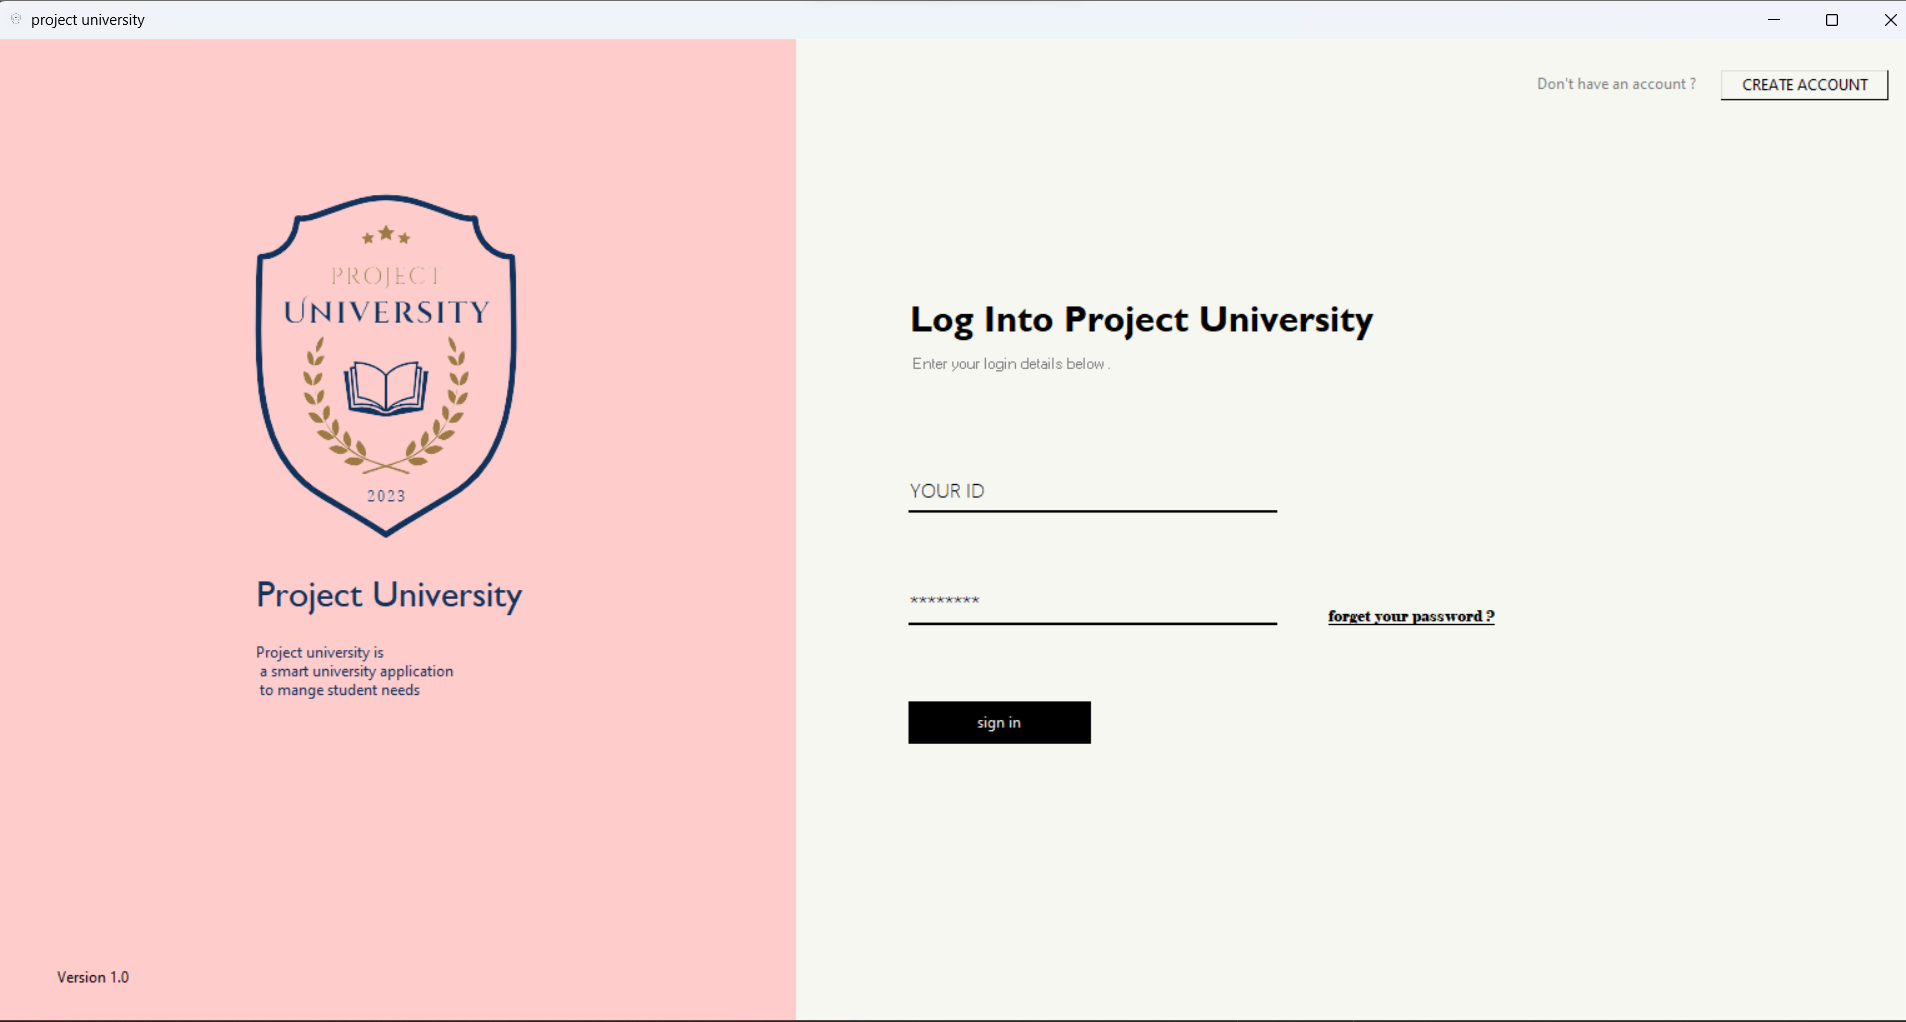

# ---------------------------------------------------------------------------------------------------------------

# now let's make a connect with our data base

In [ ]:
self.connection = mysql.connector.connect(

            host='localhost',
            user='root',
            port='3306',
            password='',
            database='py_dp_st',


        )

        self.c = self.connection.cursor()


### This code creates two Label widgets using tkinter. The labels provide instructions for the user on a login form. The first label is a heading displaying "Log Into Project University," and the second label provides additional information on the form.

# ---------------------------------------------------------------------------------------------------------------

# sign in logic

In [ ]:
def sign_in_logic(self):
        usern = self.id_var.get().strip()
        password = self.pass_var.get().strip()

        vals = (usern, password)
        select_query = "SELECT * FROM `studeny_info` WHERE `id` =%s AND `PASSWORD` = + %s"
        self.c.execute(select_query, vals)
        user = self.c.fetchone()

        if user is not None:
            self.login_user(usern, password)
            messagebox.showinfo('project', 'welcome')
            root.destroy()
            import mainuni
        else:
            messagebox.showerror('error', 'Wrong Username or Password')

### This code defines a method called "sign_in_logic" that handles user login. The method retrieves the user's entered values, executes a SQL SELECT query to retrieve the user's information from the database, and logs the user in if the credentials are valid. An error message is shown if the credentials are not valid. If the user logs in successfully, a welcome message is displayed, the current window is closed, and the main window of the application is opened.

# ---------------------------------------------------------------------------------------------------------------

# logs the user in and inserts their information into a second table in the database

In [ ]:
    def login_user(self, usern, password):
        vals = (usern, password)
        select_query = "SELECT * FROM `studeny_info` WHERE `id` = %s AND `PASSWORD` =  %s"
        self.c.execute(select_query, vals)
        result = self.c.fetchone()
        # insert row into second table
        insert_query = "INSERT INTO `copy_single_student_user` (`id`,`NAME`, `PHONE`, `EMAIL`, `PASSWORD`, `LEVEL`, `FACULTY`,`Time`) VALUES (%s, %s, %s,%s,%s,%s,%s,%s)"
        insert_values = (result[0], result[1], result[2], result[3], result[4],
                         result[5], result[6], time.strftime('%Y-%m-%d %H:%M:%S'))
        self.c.execute(insert_query, insert_values)
        self.connection.commit()

### This code defines a method called "login_user" that logs the user in and inserts their information into a second table in the database. The method retrieves the user's information by executing a SQL SELECT query with the values entered by the user. The user's information is then inserted into a second table using a SQL INSERT query, along with the current time. The changes are committed to the database using the "commit" method on the database connection object.

# ---------------------------------------------------------------------------------------------------------------

# opens the signup window when the "CREATE ACCOUNT" button is clicked 

In [ ]:
def sign_up(self):
    root.destroy()
    import signup

### This code defines a method called "sign_up" that opens the signup window when the "CREATE ACCOUNT" button is clicked. The method closes the current GUI window using the "root.destroy" method and imports the code for the signup window from the "signup" module.

# ---------------------------------------------------------------------------------------------------------------
